In [21]:
import pandas as pd
import statsmodels.api as sm
df = pd.read_csv("./data/chol_data.csv")
X = df[["Age", "Diabetes"]]
X = sm.add_constant(X)
y = df["TotChol"]
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                TotChol   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     4.054
Date:                Tue, 22 Apr 2025   Prob (F-statistic):             0.0180
Time:                        23:49:08   Log-Likelihood:                -700.91
No. Observations:                 473   AIC:                             1408.
Df Residuals:                     470   BIC:                             1420.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8000      0.156     30.750      0.0

In [30]:
# Extract standard error and residual standard deviation from the OLS model
std_err_age = model.bse['Age']  # Standard error for the Age coefficient
std_err_diabetes = model.bse['Diabetes']  # Standard error for the Diabetes coefficient
std_dev = np.sqrt(model.mse_resid)  # Residual standard deviation (sqrt of mean squared error of residuals)

# Print the computed values
print(f"Standard Error (Age): {std_err_age}")
print(f"Standard Error (Diabetes): {std_err_diabetes}")
print(f"Residual Standard Deviation: {std_dev}")

Standard Error (Age): 0.0030276109609218933
Standard Error (Diabetes): 0.16071239629301984
Residual Standard Deviation: 1.0683038100869255


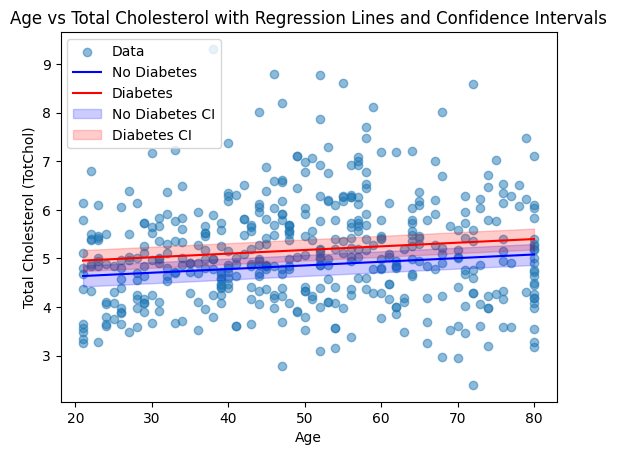

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Scatterplot of Age vs TotChol
plt.scatter(df['Age'], df['TotChol'], alpha=0.5, label='Data')

# Define regression lines using the coefficients
ages = np.linspace(df['Age'].min(), df['Age'].max(), 100)

# Regression line equations
totchol_no_diabetes = 4.4823 + 0.0075 * ages
totchol_diabetes = 4.8 + 0.0075 * ages

# Calculate confidence intervals
# Assuming standard errors for simplicity (replace with actual values if available)
std_err = 0.11  # Example standard error
ci_no_diabetes_upper = totchol_no_diabetes + 1.96 * std_err
ci_no_diabetes_lower = totchol_no_diabetes - 1.96 * std_err
ci_diabetes_upper = totchol_diabetes + 1.96 * std_err
ci_diabetes_lower = totchol_diabetes - 1.96 * std_err

# Plot regression lines
plt.plot(ages, totchol_no_diabetes, color='blue', label='No Diabetes')
plt.plot(ages, totchol_diabetes, color='red', label='Diabetes')

# Add confidence intervals
plt.fill_between(ages, ci_no_diabetes_lower, ci_no_diabetes_upper, color='blue', alpha=0.2, label='No Diabetes CI')
plt.fill_between(ages, ci_diabetes_lower, ci_diabetes_upper, color='red', alpha=0.2, label='Diabetes CI')

# Add labels and legend
plt.xlabel('Age')
plt.ylabel('Total Cholesterol (TotChol)')
plt.title('Age vs Total Cholesterol with Regression Lines and Confidence Intervals')
plt.legend()
plt.show()

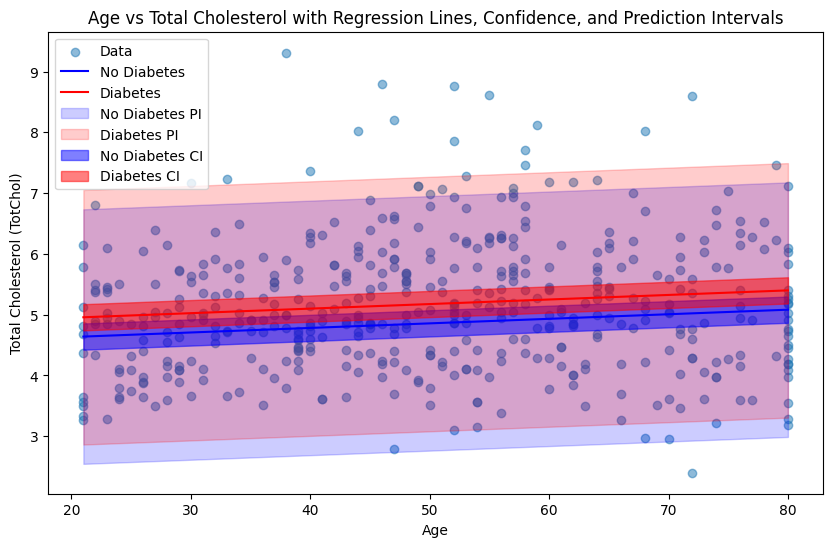

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Scatterplot of Age vs TotChol
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['TotChol'], alpha=0.5, label='Data')

# Define regression lines using the coefficients
ages = np.linspace(df['Age'].min(), df['Age'].max(), 100)

# Regression line equations
totchol_no_diabetes = 4.4823 + 0.0075 * ages
totchol_diabetes = 4.8 + 0.0075 * ages

# Update with actual standard error and residual standard deviation
std_err = 0.11  # Standard error for confidence intervals
std_dev = 1.0683038100869255  # Residual standard deviation for prediction intervals

# Calculate confidence intervals
ci_no_diabetes_upper = totchol_no_diabetes + 1.96 * std_err
ci_no_diabetes_lower = totchol_no_diabetes - 1.96 * std_err
ci_diabetes_upper = totchol_diabetes + 1.96 * std_err
ci_diabetes_lower = totchol_diabetes - 1.96 * std_err

# Calculate prediction intervals
pi_no_diabetes_upper = totchol_no_diabetes + 1.96 * std_dev
pi_no_diabetes_lower = totchol_no_diabetes - 1.96 * std_dev
pi_diabetes_upper = totchol_diabetes + 1.96 * std_dev
pi_diabetes_lower = totchol_diabetes - 1.96 * std_dev

# Plot regression line
plt.plot(ages, totchol_no_diabetes, color='blue', label='No Diabetes')
plt.plot(ages, totchol_diabetes, color='red', label='Diabetes')



# Add prediction intervals
plt.fill_between(ages, pi_no_diabetes_lower, pi_no_diabetes_upper, color='blue', alpha=0.2, label='No Diabetes PI')
plt.fill_between(ages, pi_diabetes_lower, pi_diabetes_upper, color='red', alpha=0.2, label='Diabetes PI')

# Add confidence intervals
plt.fill_between(ages, ci_no_diabetes_lower, ci_no_diabetes_upper, color='blue', alpha=0.5, label='No Diabetes CI')
plt.fill_between(ages, ci_diabetes_lower, ci_diabetes_upper, color='red', alpha=0.5, label='Diabetes CI')

# Add labels and legend
plt.xlabel('Age')
plt.ylabel('Total Cholesterol (TotChol)')
plt.title('Age vs Total Cholesterol with Regression Lines, Confidence, and Prediction Intervals')
plt.legend()
plt.show()

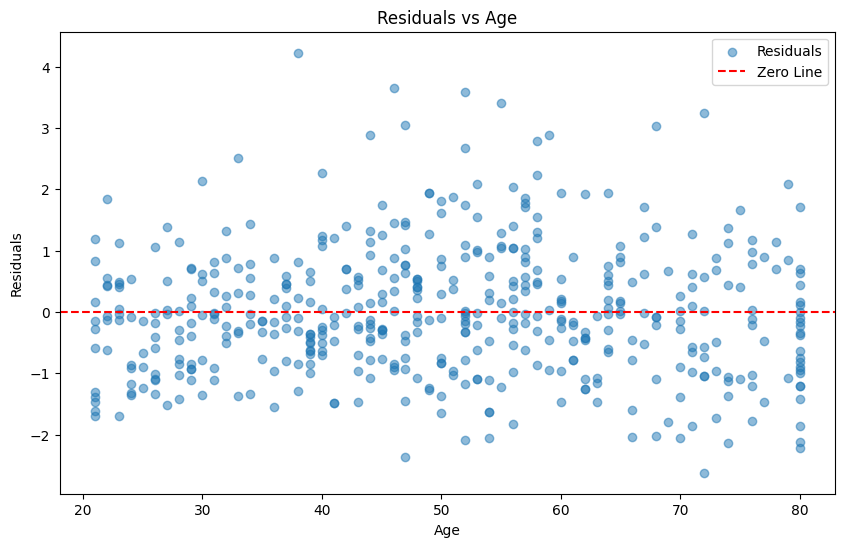

In [40]:
import matplotlib.pyplot as plt

# Calculate residuals
df['Residuals'] = model.resid

# Plot residuals against Age
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Residuals'], alpha=0.5, label='Residuals')
plt.axhline(0, color='red', linestyle='--', label='Zero Line')

# Add labels and legend
plt.xlabel('Age')
plt.ylabel('Residuals')
plt.title('Residuals vs Age')
plt.legend()
plt.show()

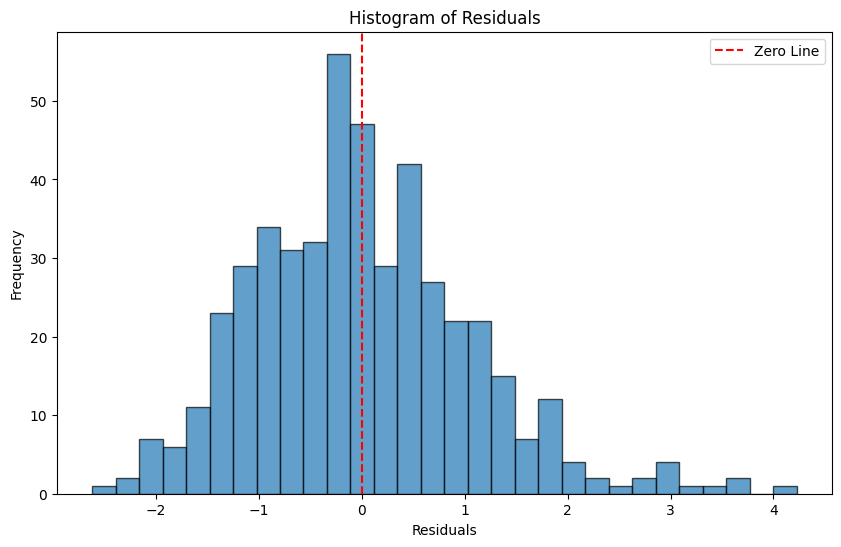

In [41]:
import matplotlib.pyplot as plt

# Plot histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(df['Residuals'], bins=30, edgecolor='black', alpha=0.7)
plt.axvline(0, color='red', linestyle='--', label='Zero Line')

# Add labels and title
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.legend()
plt.show()